# Introduction
In this project, I will be working with five different dataframes pertaining to Instacart orders made in 2017. Instacart is a grocery delivery service, and by analyzing these dataframes we can learn a lot about the platform and its customers. The data we will be using was publicly released by Instacart. Before we begin, let's outline a clear understanding of each dataframe:
### instacart_orders.csv: each row corresponds to one order on the Instacart app
- **'order_id':** ID number that uniquely identifies each order
- **'user_id':** ID number that uniquely identifies each customer account
- **'order_number':** the number of times this customer has placed an order
- **'order_dow':** day of the week that the order placed (which day is 0 is uncertain)
- **'order_hour_of_day':** hour of the day that the order was placed
- **'days_since_prior_order':** number of days since this customer placed their previous order
### products.csv: each row corresponds to a unique product that customers can buy
- **'product_id':** ID number that uniquely identifies each product
- **'product_name':** name of the product
- **'aisle_id':** ID number that uniquely identifies each grocery aisle category
- **'department_id':** ID number that uniquely identifies each grocery department category
### order_products.csv: each row corresponds to one item placed in an order
- **'order_id':** ID number that uniquely identifies each order
- **'product_id':** ID number that uniquely identifies each product
- **'add_to_cart_order':** the sequential order in which each item was placed in the cart
- **'reordered':** 0 if the customer has never ordered this product before, 1 if they have
### aisles.csv
- **'aisle_id':** ID number that uniquely identifies each grocery aisle category
- **'aisle':** name of the aisle
### departments.csv
- **'department_id':** ID number that uniquely identifies each grocery department category
- **'department':** name of the department


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
products_df = pd.read_csv('/datasets/products.csv', sep=';')

In [3]:
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')

In [4]:
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')

In [5]:
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')

In [6]:
instacart_orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [7]:
products_df.info()
departments_df.info()
aisles_df.info()
order_products_df.info(show_counts=True)
instacart_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
#check for duplicated orders
instacart_orders_df.duplicated().sum()
#this counts the amount of duplicate orders in the dataframe by using sum()


15

In [9]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_orders = instacart_orders_df.query("order_dow == 3 and order_hour_of_day == 2")
#used query() to filter df based on day of week and hour order was placed
print(wednesday_orders) 

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [10]:
display(instacart_orders_df.head(3))

instacart_orders_df.tail(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0
478966,2071924,1730,18,1,14,15.0


In [11]:
# Remove duplicate orders
instacart_orders_df = instacart_orders_df.drop_duplicates().reset_index(drop = True) 
#called drop_duplicates to get rid of duplicate rows, and reset index to avoid confusion. 


In [12]:
# Double check for duplicate rows
print(instacart_orders_df.duplicated().sum())
#recounting the amount of duplicates with sum(), expectation is output should be 0

0


In [13]:
# Double check for duplicate order IDs only
print(instacart_orders_df.duplicated('order_id').sum())


0


1. called drop_duplicates to get rid of duplicate rows, and reset index to avoid confusion. 
2. recounting the amount of duplicates with sum(), expectation is output should be 0.
3. counting the amount of duplicates in just the 'order_id' column


### `products` data frame

In [14]:
# Check for fully duplicate rows
print(products_df.duplicated().sum())


0


In [15]:
# Check for just duplicate product IDs
print(products_df.duplicated('product_id').sum())

0


In [16]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_df['product_name'] = products_df['product_name'].str.lower()
print(products_df['product_name'].duplicated().sum())

1361


In [17]:
# Check for duplicate product names that aren't missing
duplicate_prods = products_df['product_name'].dropna()
print(duplicate_prods.duplicated().sum())

104


1. used duplicated().sum() to count duplicate rows in the df
2. used duplicated().sum() with the column 'product_id' passed to duplicated() to only check for duplicates in that column
3. converted all product names to lower case with str.lower(), and then checked for duplicates with duplicated().sum()
4. used dropna() on the 'product_name' column to get rid of the missing values, stored it in a new variable called duplicate_prods, and then called duplicated().sum() to get our total of duplicates that are not missing. 

### `departments` data frame

In [18]:
#checking duplicate rows 
print(departments_df.duplicated().sum())

0


In [19]:
#checking duplicate department_ids
print(departments_df.duplicated('department_id').sum())

0


1. used duplicated().sum() to count duplicate rows in the departments df
2. used duplicated().sum() with column 'department_id' passed to duplicated() to check for duplicates in that column only 

### `aisles` data frame

In [20]:
#checking duplicate rows in aisles df
print(aisles_df.duplicated().sum())

0


In [21]:
#checking for duplicate aisle_ids in the df
print(aisles_df.duplicated('aisle_id').sum())

0


1. used duplicated().sum() to count duplicate rows in the departments df
2. used duplicated().sum() with column 'aisle_id' passed to duplicated() to check for duplicates in that column only 

### `order_products` data frame

In [22]:
# Check for fullly duplicate rows
print(order_products_df.duplicated().sum())

0


In [23]:
# Double check for any other tricky duplicates
print(order_products_df.duplicated(['order_id','product_id']).sum())

0


1. used duplicated().sum() to check amount of fully duplicated rows
2. specified both 'order_id' and 'product_id' columns to check for duplicates based on the same product_id showing up multiple times in one order. If the result was any number > 0, we can infer that there was a possible duplicate entry.  

## Find and remove missing values


### `products` data frame

In [24]:
na_products = products_df[(products_df['product_name']).isna()]
print(na_products)
print()
print(na_products.isna().sum())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [25]:
# Are all of the missing product names associated with aisle ID 100?
print(na_products[(na_products['aisle_id'] != 100)])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [26]:
# Are all of the missing product names associated with department ID 21?
print(na_products[(na_products['department_id'] != 21)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [27]:
# What is this ailse and department?
print(aisles_df[(aisles_df['aisle_id']==100)])
print()
print(departments_df[(departments_df['department_id']==21)])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


In [28]:
# Fill missing product names with 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna(value='Unknown')
print(products_df['product_name'].isna().sum())

0


1. filtered the products df for rows where the product_name has a missing value, set it to a new variable and printed the df
2. filtered the missing value df even further to only print rows where the aisle_id does not equal 100. The result is an empty dataframe, which would show that all of the missing values are associated with this aisle ID.
3. similar to the last step, filtered the missing value df to only print rows where the department ID is 21. The result was an empty dataframe, suggesting that all of the missing values are associated with department ID 21.
4. used filtering to print the corresponding rows for aisle ID 100 and department ID 21 to see the names of each. both have values of 'missing', which would imply that we do not know what aisle or department this corresponds to.
5. used fillna() with the value set to 'Unknown' to replace missing product names with Unknown. Then used isna().sum() to double check that the missing values were properly replaced. 

### `orders` data frame

In [29]:
missing_days = instacart_orders_df[(instacart_orders_df['days_since_prior_order'].isna())]
missing_days

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [30]:
# Are there any missing values where it's not a customer's first order?
missing_days[(missing_days['order_number']!= 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


1. filtered instacart orders df to see only rows with missing values in the days_since_prior_order column.
2. filtered the missing values dataframe to show any rows where the order_number did not equal 1. The result was an empty dataframe, showing us that the only missing values were from customer's first orders.

### `order_products` data frame

In [31]:
print(order_products_df[(order_products_df['add_to_cart_order']).isna()])


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [32]:
# What are the min and max values in this column?
print(order_products_df['add_to_cart_order'].max(),'is the max value')
print()
print(order_products_df['add_to_cart_order'].min(), 'is the min value')

64.0 is the max value

1.0 is the min value


In [33]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_add = order_products_df[(order_products_df['add_to_cart_order']).isna()]
order_ids_missing = missing_add['order_id'].unique()
print(order_ids_missing)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [34]:
# Do all orders with missing values have more than 64 products?
mask = order_products_df['order_id'].isin(order_ids_missing)
order_products_df[mask].groupby('order_id')['product_id'].count().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

In [35]:
# Replace missing values with 999 and convert column to integer type
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(value=999)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('int')
order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


1. filtered order_products df for any rows with missing values in add_to_cart_order column
2. used max() and min() respectively to get the max and min
3. used unique() on the df with missing values to get a list of all the order_ids with missing values in the add_to_cart_order column
4. used the list of order_ids with missing values to filter the original order_products df, and used count() to see how many products were on each order_id. also used sort_values(), which shows that the lowest amount of products for one of these orders was 65. Thus answering the question that all orders with missing values have more than 64 products. 
5. used fillna() to replace missing values with 999, and then astype('int') to change the column from float type to integer type. also printed the info to double check that the column was properly converted. 

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [36]:
sorted(instacart_orders_df['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [37]:
sorted(instacart_orders_df['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]

### Conclusion  
By using unique() on both the 'day of week' and 'hour of day' columns, we are able to get a list of all the values found in this column. We can then pass these lists to sorted() to for an orgaized presentation of the values. As we can see, the values in both columns are sensible because they fall within the range of values we expected.

### [A2] What time of day do people shop for groceries?

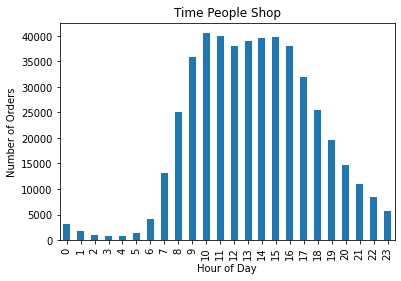

In [38]:
hourly_counts = instacart_orders_df['order_hour_of_day'].value_counts().sort_index()
hourly_counts.plot(kind='bar', title='Time People Shop')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

created a bar graph to show the number of orders being placed at each time of day  
### Conclusion 
Based on the above graph, we can see that the vast majorty of orders placed occur between the hours 8:00 am and 6:00 pm. The early hours between midnight and 6:00 am see the least amount of orders placed. 

### [A3] What day of the week do people shop for groceries?

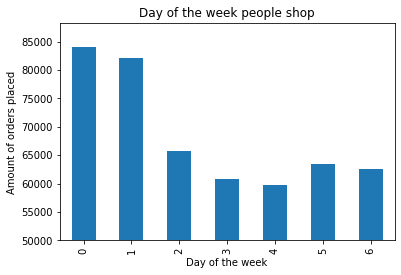

In [39]:
instacart_orders_df['order_dow'].value_counts().sort_index().plot(kind='bar',
                        x='order_dow',
                        title ='Day of the week people shop',
                        ylim=50000,
                        xlabel='Day of the week',
                        ylabel='Amount of orders placed')
plt.show()

Created a bar graph to show which days of the week have the most amount of orders placed. I set to the ylim to 50000 to better highlight the differences between each day.

### Conclusion
This graph shows us that most people are doing their shopping on Instacart on Sundays and Mondays. This could suggest that most customers want to get their shopping done at the beginning of the week in order to prep for the rest of the week. The graph also shows that the least popular days for Instacart are Wednesdays and Thursdays. This could perhaps suggest that people are bogged down in the middle of their week, thus placing less orders. 

### [A4] How long do people wait until placing another order?

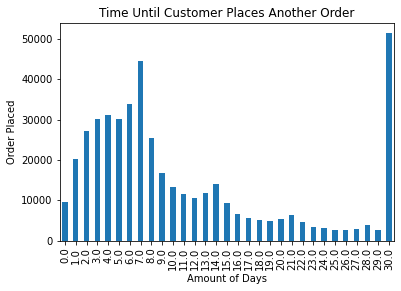

In [40]:
placing_orders = instacart_orders_df['days_since_prior_order'].value_counts().sort_index()
placing_orders.plot(kind='bar',
                   title='Time Until Customer Places Another Order',
                   xlabel='Amount of Days',
                   ylabel='Order Placed')
plt.show()

used value_counts() to calculate how many orders were placed for each value in the days_since_prior_order column. then used this info to create a bar chart that plots the amount of time people wait before placing orders.

In [41]:
print(instacart_orders_df['days_since_prior_order'].max(), 'is the max')
print()
print(instacart_orders_df['days_since_prior_order'].min(), 'is the min')

30.0 is the max

0.0 is the min


### Conclusion 
This plot shows us that the most amount of time elapsed before placing another order is 30 days, and that the minimum amount of time is the next order being placed in the same day as the last order. The plot would also suggest the most customers are either using the service quite often (at least once a week), or only once a month. 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [42]:
wednesday_data = instacart_orders_df[instacart_orders_df['order_dow']==3]
saturday_data = instacart_orders_df[instacart_orders_df['order_dow']==6]

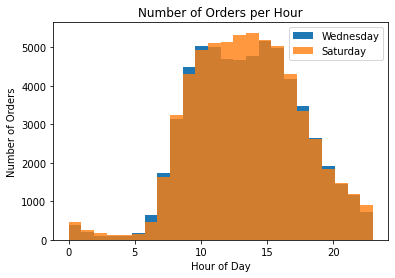

In [43]:
wednesday_data['order_hour_of_day'].plot(kind='hist',
                                         bins=24,
                                         title='Number of Orders per Hour')
saturday_data['order_hour_of_day'].plot(kind='hist',
                                        bins=24,
                                        alpha=0.8)
plt.legend(['Wednesday','Saturday'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

### Conclusion
The histogram created shows the number of orders placed for each hour of the day on both Wednesdays and Saturdays. Both days follow the same general trend and have similar shapes. The biggest difference in the two days of the week occurs right in the middle of the day. On Wednesday's, the number of orders placed takes a dip between the hours of noon and 3:00 pm. Meanwhile, the number of orders placed on Saturday's during that same time frame is gradually increasing.

### [B2] What's the distribution for the number of orders per customer?

In [44]:
orders_per_cust = instacart_orders_df.groupby('user_id')['order_number'].count()

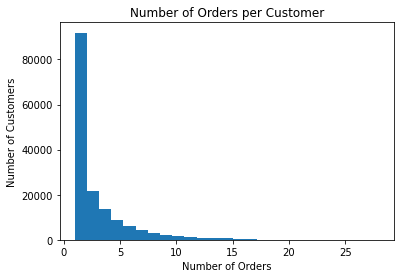

In [45]:
orders_per_cust.plot(kind='hist',
                     x='order_number',
                     title='Number of Orders per Customer',
                     bins=25)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

### Conclusion
The histogram created shows the distribution of orders per customer. The vast majority of customers only place 1 order. The number of customers decreases drastically between 1 and 2 orders placed. The number of customers continues to decrease as the number of orders increases. The majority of customers don't surpass 10 orders.

### [B3] What are the top 20 popular products (display their id and name)?

In [46]:
merged_df = pd.merge(order_products_df, products_df, on='product_id')

In [47]:
product_count = merged_df.groupby(['product_id', 'product_name']).size().reset_index(name='count')
product_count = product_count.sort_values(by='count', ascending=False)

In [48]:
product_count[['product_id', 'product_name']].head(20)

,product_id,product_name
22808,24852,banana
12025,13176,bag of organic bananas
19370,21137,organic strawberries
20077,21903,organic baby spinach
43271,47209,organic hass avocado
43788,47766,organic avocado
43663,47626,large lemon
15364,16797,strawberries
24047,26209,limes
25556,27845,organic whole milk


The dataframe shown highlights the top 20 products with their names and ids displayed.
### Conclusion 
Based on this dataframe of top 20 products, we can see that 19 of the 20 products are either fruits or vegetables. It seems that Instacart customers order more healthy food than unhealthy food. 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [49]:
items_per_order = order_products_df.groupby('order_id')['product_id'].count()


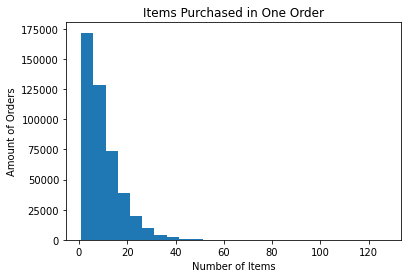

In [50]:
items_per_order.plot(kind='hist',bins=25, title='Items Purchased in One Order')
plt.xlabel('Number of Items')
plt.ylabel('Amount of Orders')
plt.show()

### Conclusion 
The vast majority of the orders placed have less than 10 items purchased.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [51]:
reordered_counts = order_products_df[order_products_df['reordered'] == 1]['product_id'].value_counts()

In [52]:
reordered_counts_df = reordered_counts.reset_index()
reordered_counts_df.columns = ['product_id', 'reordered_count']

In [53]:
top_reordered_20 = reordered_counts_df.head(20)

In [54]:
top_reordered_20 = top_reordered_20.merge(products_df[['product_id', 'product_name']], on='product_id', how='left')
top_reordered_20[['product_id','product_name']]

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,27845,organic whole milk
7,47626,large lemon
8,27966,organic raspberries
9,16797,strawberries


### Conclusion
This dataframe is very similar to the Top 20 Products dataframe we saw earlier. From this we can see that not only are fruits and vegetable the most commonly ordered products, but they are also the most commonly **reordered** products as well. 

## Overall Conclusion
By looking at the data that Instacart has provided, we were able to learn a great deal about the customer base and their ordering habits. Overall, we were able to see that most customers place orders at the beginning of the week, and  the least amount of orders are placed in the middle of the week. This can help Instacart determine how many drivers are needed on the road depending on the day of the week. Sundays and Mondays defintely require the most drivers.  
We were also able to see that most customers will either place their next order within a week of their last order, or wait a whole month. Most people don't place orders within 2 and 3 weeks of their previous order. In terms of order frequency, we were also able to see that most customers don't have more than 10 orders placed. 
We were also able to see that most orders placed are on the smaller side (10 items or less). 
Lastly, and perhaps most surprisingly, the most popular products ordered and reordered on the app were fruits and vegetables.